In [294]:
import pandas as pd
from tensorflow import keras as ks
import numpy as np
from tensorflow.keras import Input
import tensorflow as tf

In [295]:
train = pd.read_csv('../data/split_data/train_stats.csv', index_col=0)
test = pd.read_csv('../data/split_data/test_stats.csv', index_col=0)
train.head()

,tension_index_int,mode_int,std_int,mean_int,var_int,pnn50_int,RMSSD_int,ivr_int,vpr_int,papr_int,...,y40,y41,y42,y43,y44,y45,y46,y47,y48,y49
0,1.464797e+08,0.227959,0.032626,0.243542,13.396406,0.0,0.038905,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.464797e+08,0.227959,0.032801,0.243854,13.451273,0.0,0.039181,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.464797e+08,0.227959,0.033088,0.244401,13.538579,0.0,0.039247,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.464797e+08,0.227959,0.033308,0.244818,13.605041,0.0,0.039266,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.464797e+08,0.227959,0.033349,0.244896,13.617806,0.0,0.039219,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
zero_train = train.copy()

for column in zero_train.iloc[:, -50:].columns:
    zero_train = zero_train.loc[zero_train[column] == 0]

zero_train.iloc[0:, -100: -50]

,r-r-0,r-r-1,r-r-2,r-r-3,r-r-4,r-r-5,r-r-6,r-r-7,r-r-8,r-r-9,...,r-r-40,r-r-41,r-r-42,r-r-43,r-r-44,r-r-45,r-r-46,r-r-47,r-r-48,r-r-49
0,0.253906,0.247396,0.251302,0.260417,0.255208,0.263021,0.291667,0.305990,0.304687,0.295573,...,0.239583,0.238281,0.227865,0.226562,0.227865,0.230469,0.227865,0.236979,0.242188,0.251302
1,0.247396,0.251302,0.260417,0.255208,0.263021,0.291667,0.305990,0.304687,0.295573,0.265625,...,0.238281,0.227865,0.226562,0.227865,0.230469,0.227865,0.236979,0.242188,0.251302,0.269531
2,0.251302,0.260417,0.255208,0.263021,0.291667,0.305990,0.304687,0.295573,0.265625,0.251302,...,0.227865,0.226562,0.227865,0.230469,0.227865,0.236979,0.242188,0.251302,0.269531,0.274740
3,0.260417,0.255208,0.263021,0.291667,0.305990,0.304687,0.295573,0.265625,0.251302,0.246094,...,0.226562,0.227865,0.230469,0.227865,0.236979,0.242188,0.251302,0.269531,0.274740,0.272135
4,0.255208,0.263021,0.291667,0.305990,0.304687,0.295573,0.265625,0.251302,0.246094,0.233073,...,0.227865,0.230469,0.227865,0.236979,0.242188,0.251302,0.269531,0.274740,0.272135,0.264323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,0.195312,0.197917,0.197917,0.199219,0.196615,0.196615,0.195312,0.197917,0.196615,0.194010,...,0.196615,0.195312,0.395833,0.195312,0.195312,0.391927,0.191406,0.194010,0.192708,0.192708
3588,0.197917,0.197917,0.199219,0.196615,0.196615,0.195312,0.197917,0.196615,0.194010,0.192708,...,0.195312,0.395833,0.195312,0.195312,0.391927,0.191406,0.194010,0.192708,0.192708,0.191406
3589,0.197917,0.199219,0.196615,0.196615,0.195312,0.197917,0.196615,0.194010,0.192708,0.192708,...,0.395833,0.195312,0.195312,0.391927,0.191406,0.194010,0.192708,0.192708,0.191406,0.191406
3590,0.199219,0.196615,0.196615,0.195312,0.197917,0.196615,0.194010,0.192708,0.192708,0.188802,...,0.195312,0.195312,0.391927,0.191406,0.194010,0.192708,0.192708,0.191406,0.191406,0.191406


In [297]:
one_test = test.copy()

for column in one_test.iloc[:, -50:].columns:
    one_test = one_test.loc[one_test[column] == 0]
one_test

,tension_index_int,mode_int,std_int,mean_int,var_int,pnn50_int,RMSSD_int,ivr_int,vpr_int,papr_int,...,y40,y41,y42,y43,y44,y45,y46,y47,y48,y49
0,4.793620e+08,0.184861,0.029858,0.186016,16.051476,0.0,0.041820,1.772308,22.826760,2.271976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.791211e+08,0.184954,0.037261,0.189245,19.689084,0.0,0.053429,1.772308,22.815290,2.270834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.790208e+08,0.184993,0.037243,0.189453,19.657941,0.0,0.048180,1.772308,22.810515,2.270359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.006937e+08,0.180393,0.042433,0.186745,22.722352,0.0,0.067617,1.445647,16.695570,2.660856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.006937e+08,0.180393,0.043855,0.185495,23.642073,0.0,0.066193,1.445647,16.695570,2.660856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,8.653761e+08,0.185118,0.046647,0.197005,23.677822,0.0,0.069843,3.203926,25.452238,3.673341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,8.653761e+08,0.185118,0.046633,0.197057,23.664546,0.0,0.069842,3.203926,25.452238,3.673341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,8.400887e+08,0.185081,0.046603,0.197188,23.634071,0.0,0.069850,3.109693,25.457235,3.566002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,8.400887e+08,0.185081,0.046603,0.197187,23.634071,0.0,0.069842,3.109693,25.457235,3.566002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
test_copy = test.copy()
test_copy.drop(index=one_test.index, inplace=True)


In [308]:
r_r_series_input = Input(shape=(50, 1))
r_r_series_layer = ks.layers.Conv1D(filters=32,
                                    kernel_size=5,
                                    padding='same',
                                    #strides=2,
                                    activation='relu')(r_r_series_input)
r_r_series_layer = ks.layers.Dropout(0.2)(r_r_series_layer)
r_r_series_layer = ks.layers.Conv1D(filters=16,
                                    kernel_size=5,
                                    padding='same',
                                    #strides=2,
                                    activation='relu')(r_r_series_layer)
r_r_series_layer = ks.layers.Dropout(0.2)(r_r_series_layer)
#r_r_series_model = ks.Model(inputs=r_r_series_input, outputs=r_r_series_layer)

'''
time_series_input = Input(shape=12)
time_series_layer = ks.layers.Dense(16, 'tanh')(time_series_input)
time_series_layer = ks.layers.Dense(32, 'tanh')(time_series_layer)
time_series_model = ks.Model(inputs=time_series_input, outputs=time_series_layer)

concatenate_layer = ks.layers.concatenate(inputs=[r_r_series_model.output,
                                                  time_series_model.output])
'''

r_r_series_decoder_layer = ks.layers.Conv1DTranspose(filters=16,
                                                     kernel_size=5,
                                                     padding="same",
                                                     #strides=2,
                                                     activation="relu")(r_r_series_layer)
r_r_series_decoder_layer = ks.layers.Dropout(0.2)(r_r_series_decoder_layer)

r_r_series_decoder_layer = ks.layers.Conv1DTranspose(filters=32,
                                                     kernel_size=5,
                                                     padding="same",
                                                     #strides=2,
                                                     activation="relu")(r_r_series_decoder_layer)
r_r_series_decoder_layer = ks.layers.Conv1DTranspose(filters=1,
                                                     kernel_size=5,
                                                     padding="same")(r_r_series_decoder_layer)


r_r_series_model = ks.Model(inputs=r_r_series_input,
                                    #time_series_model.input],
                            outputs=r_r_series_decoder_layer)

In [309]:
r_r_series_model.compile(optimizer='adam',
                         loss='mse',
                         metrics='mae')

In [310]:
r_r_series_model.fit(batch_size=16,
                     x=zero_train.iloc[:, 24:-50].values.reshape(-1,50,1),
                        #zero_train.iloc[:, 12:24]],
                     y=zero_train.iloc[:, 24:-50].values.reshape(-1,50,1),
                     validation_data=(test_copy.iloc[:, 24:-50].values.reshape(-1,50,1),
                                       #test_copy.iloc[:, 12:24]],
                                      test_copy.iloc[:, 24:-50].values.reshape(-1,50,1)),
                     epochs=20)

Epoch 1/20
136/136 [==============================] - 16s 13ms/step - loss: 0.0151 - mae: 0.0883 - val_loss: 5.2544e-04 - val_mae: 0.0165

In [311]:
pred = r_r_series_model.predict(test_copy.iloc[:, 24:-50].values.reshape(-1,50,1)
                                #, test_copy.iloc[:, 12:24]]
)

In [313]:
import matplotlib.pyplot as plt

train_pred = r_r_series_model.predict(zero_train.iloc[:, 24:-50].values.reshape(-1,50,1),
                                       #zero_train.iloc[:, 12:24]]
                                      )

train_mae_loss = np.mean(np.abs(zero_train.iloc[:, 24:-50].values.reshape(-1,50,1) - train_pred), axis=1)
train_mae_loss

array([[0.00406363],
       [0.00422981],
       [0.00439824],
       ...,
       [0.00851338],
       [0.0085627 ],
       [0.00863494]])

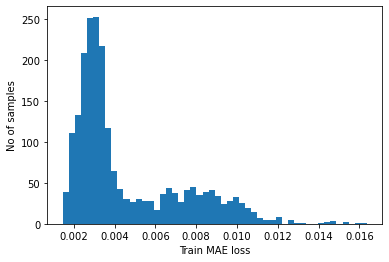

Reconstruction error threshold:  0.016367772718270616


In [314]:
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

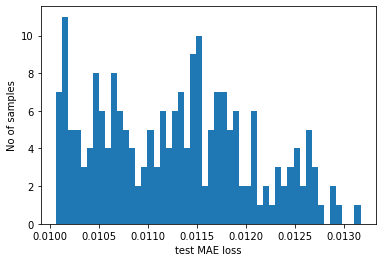

In [318]:
test_mae_loss = np.mean(np.abs(pred.reshape(-1, 50) - test_copy.iloc[:, 24:74].values), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))
plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

In [319]:
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

Number of anomaly samples:  0
Indices of anomaly samples:  (array([], dtype=int64),)


In [ ]:
chel = 15

plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, 50), pred[chel] * 10, c='r')
plt.plot(np.arange(0, 50), test_copy.iloc[chel, 24:74].values.reshape(1, -1)[0] * 10, c='g')
plt.plot(np.arange(0, 50), test_copy.iloc[chel, 74:].values.reshape(1, -1)[0]*2)

#plt.plot(np.arange(0, 1100, 1), test_copy.loc[:10, 'y0':].values.reshape(1, -1)[0] * 1000)
plt.savefig('another_test.png')

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, 50), (pred[chel] - test_copy.iloc[chel, 24:74].values.reshape(1, -1)[0]) * 50, c='r')
plt.plot(np.arange(0, 50), test_copy.iloc[chel, 74:].values.reshape(1, -1)[0])

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, 50), ( test_copy.iloc[chel, 24:74].values.reshape(1, -1)[0]) , c='r')
plt.plot(np.arange(0, 50), test_copy.iloc[chel, 74:].values.reshape(1, -1)[0])


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
f1_score(y_true=test.iloc[:, 20:-100].values.reshape(1,-1)[0], y_pred=pred.reshape(1,-1)[0], average='micro')

In [ ]:
confusion_matrix(y_true=test.iloc[:, 20:-100].values.reshape(1,-1)[0], y_pred=pred.reshape(1,-1)[0])